In [58]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv('dataset/Tweets.csv')

In [60]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [61]:
review = data[['text', 'airline_sentiment']]

In [62]:
print("Shape: ",review.shape)
review.head()

Shape:  (14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [63]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [64]:
review = review[review['airline_sentiment'] != 'neutral']
sentiment = review.airline_sentiment.factorize()
sentiment

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [65]:
tweet = review.text.values
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [66]:
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [67]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [68]:
from keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,  Embedding,SpatialDropout1D

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           160000    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_3 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 176651 (690.04 KB)
Trainable params: 176651 (690.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [77]:
history = model.fit(padded_sequence,sentiment[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 49s 153ms/step - loss: 0.3885 - accuracy: 0.8422 - val_loss: 0.1975 - val_accuracy: 0.9212
Epoch 2/5
289/289 [==============================] - 44s 153ms/step - loss: 0.2158 - accuracy: 0.9142 - val_loss: 0.1694 - val_accuracy: 0.9372
Epoch 3/5
289/289 [==============================] - 45s 154ms/step - loss: 0.1612 - accuracy: 0.9394 - val_loss: 0.1588 - val_accuracy: 0.9446
Epoch 4/5
289/289 [==============================] - 44s 152ms/step - loss: 0.1548 - accuracy: 0.9433 - val_loss: 0.1655 - val_accuracy: 0.9428
Epoch 5/5
289/289 [==============================] - 44s 154ms/step - loss: 0.1224 - accuracy: 0.9566 - val_loss: 0.1844 - val_accuracy: 0.9415


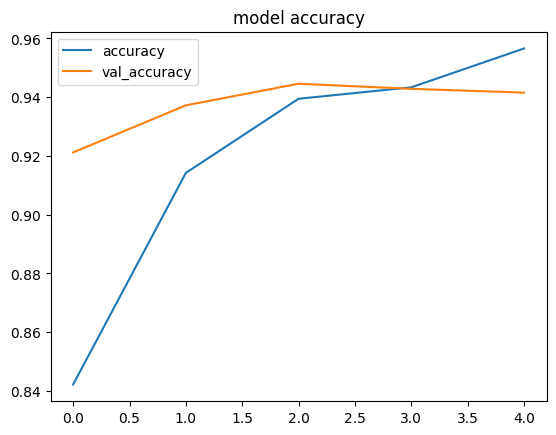

In [85]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('model accuracy')
plt.legend()
plt.show()

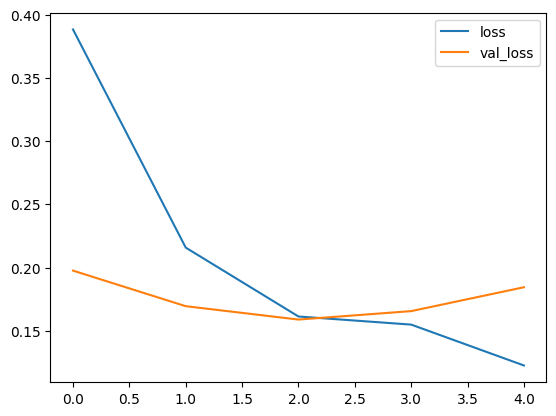

In [84]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()


In [96]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment[1][prediction])


test_sentence1 = "It was a great feeling being in thisflight"
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 34ms/step
Predicted label:  positive
1/1 [==============================] - 0s 42ms/step
Predicted label:  negative
